# Classyfing YouTube videos using tags

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

d:\miniconda3\envs\youtube-classification\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\miniconda3\envs\youtube-classification\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\miniconda3\envs\youtube-classification\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\miniconda3\envs\youtube-classification\lib\site-pack

In [2]:
from cvs_reader import load_dataframe
from dataframe_creator import create_seperate_columns

# Get dataframes with tags and category_id as columns
ca_csvpath = 'data/CAvideos.csv'
us_csvpath = 'data/USvideos.csv'
gb_csvpath = 'data/GBvideos.csv'

youtube_dfs = [load_dataframe(ca_csvpath, ['tags', 'category_id'])]
youtube_dfs += [load_dataframe(us_csvpath, ['tags', 'category_id'])]
youtube_dfs += [load_dataframe(gb_csvpath, ['tags', 'category_id'])]

# Concat three dataframes into one
tab_dataframe = pd.concat(youtube_dfs, ignore_index=True)
tab_dataframe = tab_dataframe.dropna()
tab_dataframe.head

<bound method NDFrame.head of                                                      tags  category_id
0       Eminem|Walk|On|Water|Aftermath/Shady/Interscop...           10
1       plush|bad unboxing|unboxing|fan mail|idubbbztv...           23
2       racist superman|rudy|mancuso|king|bach|racist|...           23
3       ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...           24
4       edsheeran|ed sheeran|acoustic|live|cover|offic...           10
...                                                   ...          ...
120741  Enrique Iglesias feat. Pitbull|MOVE TO MIAMI|P...           10
120742  jacob sartorius|jacob|up with it|jacob sartori...           10
120743  anne|marie|anne-marie|2002|two thousand and tw...           10
120744  Eurovision Song Contest|2018|Lisbon|Cyprus|Ele...           24
120745  Kyle|SuperDuperKyle|Ikuyo|2 Chainz|Sophia Blac...           10

[120746 rows x 2 columns]>

In [3]:
# Remove 'none' and duplicated values from dataframe
tab_dataframe = tab_dataframe[tab_dataframe['tags']!='[none]']
tab_dataframe = tab_dataframe.drop_duplicates(subset='tags')
tab_dataframe.head

<bound method NDFrame.head of                                                      tags  category_id
0       Eminem|Walk|On|Water|Aftermath/Shady/Interscop...           10
1       plush|bad unboxing|unboxing|fan mail|idubbbztv...           23
2       racist superman|rudy|mancuso|king|bach|racist|...           23
3       ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...           24
4       edsheeran|ed sheeran|acoustic|live|cover|offic...           10
...                                                   ...          ...
120589  5SOS|5 Seconds of Summer|No Roots|Cover|BBC|Ra...           10
120593  Fox News Channel|FNC|Fox News|News|Latest News...           25
120606  capitalfmofficial|capital|capital fm|capital r...           10
120623  The Chainsmokers Somebody|Chainsmokers Somebod...           10
120717  5-Minute Crafts|DIY|Do it yourself|crafts|truc...           26

[25753 rows x 2 columns]>

In [4]:
# Spliting dataframe into several dfs based on category_id
dfs = [x for _, x in tab_dataframe.groupby('category_id')]

# deleting 3 categories (29, 30, 43) beacause of lack of frequency
del dfs[14:17]

In [5]:
for df in dfs:
    print(df.head)

<bound method NDFrame.head of                                                      tags  category_id
12      電視劇|大陸電視劇|猎场|职场|商战|爱情|都市|胡歌|陈龙|孙红雷|张嘉译|祖峰|李强|胡...            1
18      Rooster Teeth|RT|animation|television|filmmaki...            1
19      sharry mann|sharry mann new song|sharry mann c...            1
45      DNC Chairwoman Donna Brazile|Hacks|The Inside ...            1
103     baby driver|edgar wright|everything wrong with...            1
...                                                   ...          ...
118584  solo|solo: a star wars story|star wars|solo re...            1
119130  State Champs|Mine Is gold|Pure Noise|Pure Nois...            1
119428  solo|star wars|solo review|solo sucks|solo mov...            1
119566  London Fields|London Fields trailer|London Fie...            1
119741  Robin Williams|HBO|HBO Docs|comedian|actor|doc...            1

[1156 rows x 2 columns]>
<bound method NDFrame.head of                                                      tags  cat

In [6]:
from sklearn.utils import resample

resampled_dfs = []
for df in dfs:
    if df.shape[0] < 2000:
        resampled_dfs += [resample(df, n_samples=2000)]
    else:
        resampled_dfs += [df.sample(n=2000)]

    
# Resampling datas to make them balanced
tab_dataframe = pd.concat(resampled_dfs, axis=0, ignore_index=True)

In [7]:
for df in resampled_dfs:
    print(df.head)

<bound method NDFrame.head of                                                     tags  category_id
16578  bright|netflix|will smith|cinemasins|cinema si...            1
34412  senselet 45|senselet episode 45 part 2|zemen|m...            1
38569  A Boogie|A Boogie Wit Da Hoodie|Way Too Fly|Da...            1
15732  leroy|1320video|drag racing|boosted|cleetus Mc...            1
48326  Amazon Studios|Amazon|amazon prime|amazon vide...            1
...                                                  ...          ...
51522  how to make youtube videos|how to get first 10...            1
2927   科幻片|奇幻片|催泪片|爱情片|温馨|暖心|几分钟看电影|几分钟说电影|几分钟讲电影|电影解...            1
18733  战争片|催泪片|感人|感动|温馨|爱情片|几分钟看电影|几分钟说电影|几分钟讲电影|影视解说...            1
376            感人|感动|剧情片|催泪片|家庭|温馨|几分钟看电影|几分钟说电影|电影解说|爱情            1
10108  idoles saison 4 épisode 2|Even Prod|idoles sai...            1

[2000 rows x 2 columns]>
<bound method NDFrame.head of                                                     tags  category_id
4971

In [8]:
new_categories_dict = {1:1, 2:2, 10:3, 15:4, 17:5, 19:6, 20:7, 22:8, 23:9, 24:10, 25:11, 26:12, 27:13, 28:14}
reversed_new_categories_dict = {value:key for key, value in new_categories_dict.items()}
categories = tab_dataframe['category_id']
tab_dataframe['category_id'] = tab_dataframe['category_id'].map(new_categories_dict)
tab_dataframe.head

<bound method NDFrame.head of                                                     tags  category_id
0      bright|netflix|will smith|cinemasins|cinema si...            1
1      senselet 45|senselet episode 45 part 2|zemen|m...            1
2      A Boogie|A Boogie Wit Da Hoodie|Way Too Fly|Da...            1
3      leroy|1320video|drag racing|boosted|cleetus Mc...            1
4      Amazon Studios|Amazon|amazon prime|amazon vide...            1
...                                                  ...          ...
27995  baseball|fastball|almost impossible|fastest pi...           14
27996  HomePod Review|HomePod features|HomePod|iJusti...           14
27997  airpods for android|AirPods|Apple AirPods|Pixe...           14
27998  samsung s9|Galaxy S9|Samsung Galaxy S9|galaxy ...           14
27999                      physics|minutephysics|science           14

[28000 rows x 2 columns]>

In [9]:
from vocab_handler import get_tags_frequency, get_tags_vocab, get_tags_vocab_as_dict


tag_frequency = get_tags_frequency(tab_dataframe['tags'])
lists = sorted(tag_frequency.items()) # sorted by key, return a list of tuples

lists[:10]

[('', 7),
 (" 'Gandarrappido: The Revenger Squad ", 0),
 (' 070118 💖', 4),
 (' 100% Will Get Satisfied', 0),
 (' 101217 💚', 0),
 (' 140118 💖', 2),
 (' 150118 💖', 0),
 (' 171217 💚', 1),
 (' 2018', 1),
 (' 220118 💖', 1)]

In [10]:
pruned_vocab = get_tags_vocab(tag_frequency, 50)
vocab_di = get_tags_vocab_as_dict(pruned_vocab)

In [11]:
max_of_tags = 20

tab_dataframe = create_seperate_columns(tab_dataframe, max_of_tags, 'tags')
tab_dataframe.head()

,category_id,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16,tag_17,tag_18,tag_19
0,1,bright,netflix,will smith,cinemasins,cinema sins,everything wrong with,eww,movie,mistakes,...,notags,notags,notags,notags,notags,notags,notags,notags,notags,notags
1,1,senselet 45,senselet episode 45 part 2,zemen,mogachoch,betoch,welafen,dana,temesgen afework,tewodros legesse,...,hollyland pictures,mela productions,notags,notags,notags,notags,notags,notags,notags,notags
2,1,A Boogie,A Boogie Wit Da Hoodie,Way Too Fly,Davido,Audio,Official,Official Audio,International Artist,Highbridge,...,Atlantic Records,Rap,Hip Hop,R&B,Afropop,Afrobeat,Nigeria,fUtlqtdn1Xo,pgN-vvVVxMA,8ORvJcpe2Oc
3,1,leroy,1320video,drag racing,boosted,cleetus McFarland,cleetus,McFarland,Leroy,bald eagles,...,procharger,1320,modified,turbo,twin turbo,precision turbo and engine,Texas speed,Texas speed and performance,tuning,tuned
4,1,Amazon Studios,Amazon,amazon prime,amazon video,original,trailer,episode,season,streaming,...,Amazon instant video,Prime Video,Prime Instant Video,David Oyelowo,Charlize Theron,Joel Edgerton,Amanda Seyfried,Sharlto Copley,Thandie Newton,Paris Jackson


In [12]:
future_df = []
col_row_dict = {}

for i in range(0, 28000):
    for col in tab_dataframe.columns:
        if col == 'category_id':
            col_row_dict.update({'category_id':tab_dataframe[col][i]})
        elif tab_dataframe[col][i] in pruned_vocab:
                col_row_dict.update({'{}'.format(tab_dataframe[col][i]):1.0})
                
    future_df.append(col_row_dict)
    col_row_dict = {}

In [13]:
final_dataframe = pd.DataFrame(future_df)
final_dataframe.fillna(0.0, inplace = True)
final_dataframe.head

<bound method NDFrame.head of        category_id  cinemasins  cinema sins  everything wrong with  eww  \
0                1         1.0          1.0                    1.0  1.0   
1                1         0.0          0.0                    0.0  0.0   
2                1         0.0          0.0                    0.0  0.0   
3                1         0.0          0.0                    0.0  0.0   
4                1         0.0          0.0                    0.0  0.0   
...            ...         ...          ...                    ...  ...   
27995           14         0.0          0.0                    0.0  0.0   
27996           14         0.0          0.0                    0.0  0.0   
27997           14         0.0          0.0                    0.0  0.0   
27998           14         0.0          0.0                    0.0  0.0   
27999           14         0.0          0.0                    0.0  0.0   

       movie  mistakes  review  Official  Rap  ...  ovni  iphone x re

In [14]:
from input_generator import generate_dataset


# Create train,validation and test examples from tags and labels dataframe
(train_ds, train_lb), (val_ds, val_lb), (test_ds, test_lb) = generate_dataset(final_dataframe, 'category_id')

In [ ]:
hidden = 200
model = tf.keras.Sequential([
    layers.Dense(hidden,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2*hidden,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(hidden*2,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(hidden,activation='relu'),

    layers.Dense(15, activation='softmax')])

nadam = keras.optimizers.Nadam(lr=0.0001)

model.compile(optimizer=nadam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

history = model.fit(train_ds.values, train_lb.values,
                    batch_size=32,
                    epochs=70,
                    validation_data=(val_ds.values, val_lb.values))


Train on 16800 samples, validate on 5600 samples
Epoch 1/70
16800/16800 [==============================] - 7s 417us/sample - loss: 2.5664 - acc: 0.1356 - val_loss: 2.1759 - val_acc: 0.3780
Epoch 2/70
16800/16800 [==============================] - 6s 384us/sample - loss: 1.8366 - acc: 0.4386 - val_loss: 1.4205 - val_acc: 0.5821
Epoch 3/70
16800/16800 [==============================] - 6s 384us/sample - loss: 1.4413 - acc: 0.5611 - val_loss: 1.2419 - val_acc: 0.6234
Epoch 4/70
16800/16800 [==============================] - 7s 393us/sample - loss: 1.2902 - acc: 0.6010 - val_loss: 1.1673 - val_acc: 0.6438
Epoch 5/70
16800/16800 [==============================] - 7s 444us/sample - loss: 1.2056 - acc: 0.6198 - val_loss: 1.1287 - val_acc: 0.6543
Epoch 6/70
16800/16800 [==============================] - 7s 441us/sample - loss: 1.1449 - acc: 0.6365 - val_loss: 1.0992 - val_acc: 0.6605
Epoch 7/70
16800/16800 [==============================] - 7s 443us/sample - loss: 1.1100 - acc: 0.6455 - val_lo

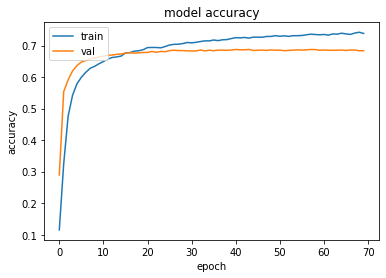

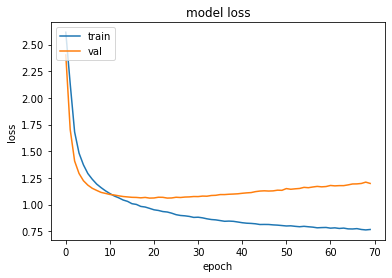

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
results = model.evaluate(test_ds, test_lb)

print(results)

5600/5600 [==============================] - 1s 92us/sample - loss: 1.1864 - acc: 0.6832
[1.186378446647099, 0.6832143]


In [21]:
from tag_handler import get_category_title_dict

predictions = model.predict(test_ds)
cat_tit_dict = get_category_title_dict('data/json/CA_category_id.json')
cat_tit_dict.update(get_category_title_dict('data/json/US_category_id.json'))
cat_tit_dict.update(get_category_title_dict('data/json/GB_category_id.json'))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test_lb, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           1       0.75      0.60      0.67       421
           2       0.92      0.74      0.82       402
           3       0.24      0.91      0.38       400
           4       0.96      0.94      0.95       394
           5       0.92      0.81      0.86       390
           6       0.95      0.91      0.93       384
           7       0.85      0.60      0.70       397
           8       0.61      0.31      0.41       415
           9       0.75      0.62      0.68       374
          10       0.62      0.39      0.48       385
          11       0.81      0.64      0.71       415
          12       0.85      0.69      0.76       409
          13       0.86      0.74      0.80       403
          14       0.91      0.70      0.79       411

    accuracy                           0.68      5600
   macro avg       0.79      0.68      0.71      5600
weighted avg       0.79      0.68      0.71      5600



In [23]:
def one_hot_to_index(one_hot):
    i_tags = []
    for i, b in enumerate(one_hot):
        if b == 1.0:
            i_tags.append(i)      
    return i_tags

def index_to_tag(i_tags):
    w_tags = []
    reversed_vocab_dict = {i: vo for vo, i in vocab_di.items()}
    for index in i_tags:
        w_tags.append(reversed_vocab_dict[index])
    return w_tags


In [24]:
for i in range(0, 10):
    y_pred = reversed_new_categories_dict[np.argmax(predictions[i])]
    label = reversed_new_categories_dict[test_lb.values[i]]
    print('""""""""""""""""""""""""""""""""""""""""""""""""')
    print('predict:{}'.format(cat_tit_dict[str(y_pred)]))
    print('true label:{}'.format(cat_tit_dict[str(label)]))

""""""""""""""""""""""""""""""""""""""""""""""""
predict:Music
true label:Entertainment
""""""""""""""""""""""""""""""""""""""""""""""""
predict:People & Blogs
true label:People & Blogs
""""""""""""""""""""""""""""""""""""""""""""""""
predict:Howto & Style
true label:Howto & Style
""""""""""""""""""""""""""""""""""""""""""""""""
predict:News & Politics
true label:Entertainment
""""""""""""""""""""""""""""""""""""""""""""""""
predict:News & Politics
true label:News & Politics
""""""""""""""""""""""""""""""""""""""""""""""""
predict:Gaming
true label:Gaming
""""""""""""""""""""""""""""""""""""""""""""""""
predict:Travel & Events
true label:Travel & Events
""""""""""""""""""""""""""""""""""""""""""""""""
predict:Film & Animation
true label:Film & Animation
""""""""""""""""""""""""""""""""""""""""""""""""
predict:Music
true label:Howto & Style
""""""""""""""""""""""""""""""""""""""""""""""""
predict:Film & Animation
true label:Film & Animation


# Classifying using tags, number of likes and number of comments


In [ ]:
full_dataframe = load_dataframe(csvpath, ['tags', 'likes', 'comment_count', 'category_id'])
max_of_tags = 25

full_dataframe = create_seperate_columns(full_dataframe, max_of_tags, 'tags')

full_dataframe.head()